In [71]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import IsolationForest
from sklearn.metrics import classification_report
from sklearn.preprocessing import RobustScaler, StandardScaler
import matplotlib.pyplot as plt
from sklearn.metrics import f1_score, make_scorer
from sklearn.model_selection import GridSearchCV

In [72]:
df = pd.read_csv(r"C:\Users\Nourhan\Documents\Graduation Project\cicids2017_cleaned.csv")
df.head()

MemoryError: Unable to allocate 385. MiB for an array with shape (20, 2520751) and data type float64

In [ ]:
df.shape

(2520751, 53)

In [ ]:
duplicated_rows = df[df.duplicated()]
print(f'Number of duplicates: {len(duplicated_rows)}')
df.shape

Number of duplicates: 161


(2520751, 53)

In [ ]:
# remove duplicates but keep first occurrence
df = df.drop_duplicates(keep="first")
df.shape

(2520590, 53)

In [ ]:
df.columns = [c.strip().replace(" ", "_") for c in df.columns]
df.head()

,Destination_Port,Flow_Duration,Total_Fwd_Packets,Total_Length_of_Fwd_Packets,Fwd_Packet_Length_Max,Fwd_Packet_Length_Min,Fwd_Packet_Length_Mean,Fwd_Packet_Length_Std,Bwd_Packet_Length_Max,Bwd_Packet_Length_Min,...,Init_Win_bytes_backward,act_data_pkt_fwd,min_seg_size_forward,Active_Mean,Active_Max,Active_Min,Idle_Mean,Idle_Max,Idle_Min,Attack_Type
0,22,1266342,41,2664,456,0,64.975610,109.864573,976,0,...,243,24,32,0.0,0,0,0.0,0,0,Normal Traffic
1,22,1319353,41,2664,456,0,64.975610,109.864573,976,0,...,243,24,32,0.0,0,0,0.0,0,0,Normal Traffic
2,22,160,1,0,0,0,0.000000,0.000000,0,0,...,243,0,32,0.0,0,0,0.0,0,0,Normal Traffic
3,22,1303488,41,2728,456,0,66.536585,110.129945,976,0,...,243,24,32,0.0,0,0,0.0,0,0,Normal Traffic
4,35396,77,1,0,0,0,0.000000,0.000000,0,0,...,290,0,32,0.0,0,0,0.0,0,0,Normal Traffic


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2520590 entries, 0 to 2520750
Data columns (total 53 columns):
 #   Column                       Dtype  
---  ------                       -----  
 0   Destination_Port             int64  
 1   Flow_Duration                int64  
 2   Total_Fwd_Packets            int64  
 3   Total_Length_of_Fwd_Packets  int64  
 4   Fwd_Packet_Length_Max        int64  
 5   Fwd_Packet_Length_Min        int64  
 6   Fwd_Packet_Length_Mean       float64
 7   Fwd_Packet_Length_Std        float64
 8   Bwd_Packet_Length_Max        int64  
 9   Bwd_Packet_Length_Min        int64  
 10  Bwd_Packet_Length_Mean       float64
 11  Bwd_Packet_Length_Std        float64
 12  Flow_Bytes/s                 float64
 13  Flow_Packets/s               float64
 14  Flow_IAT_Mean                float64
 15  Flow_IAT_Std                 float64
 16  Flow_IAT_Max                 int64  
 17  Flow_IAT_Min                 int64  
 18  Fwd_IAT_Total                int64  
 19  Fwd_I

In [ ]:
df.isna().sum()

Destination_Port               0
Flow_Duration                  0
Total_Fwd_Packets              0
Total_Length_of_Fwd_Packets    0
Fwd_Packet_Length_Max          0
Fwd_Packet_Length_Min          0
Fwd_Packet_Length_Mean         0
Fwd_Packet_Length_Std          0
Bwd_Packet_Length_Max          0
Bwd_Packet_Length_Min          0
Bwd_Packet_Length_Mean         0
Bwd_Packet_Length_Std          0
Flow_Bytes/s                   0
Flow_Packets/s                 0
Flow_IAT_Mean                  0
Flow_IAT_Std                   0
Flow_IAT_Max                   0
Flow_IAT_Min                   0
Fwd_IAT_Total                  0
Fwd_IAT_Mean                   0
Fwd_IAT_Std                    0
Fwd_IAT_Max                    0
Fwd_IAT_Min                    0
Bwd_IAT_Total                  0
Bwd_IAT_Mean                   0
Bwd_IAT_Std                    0
Bwd_IAT_Max                    0
Bwd_IAT_Min                    0
Fwd_Header_Length              0
Bwd_Header_Length              0
Fwd_Packet

In [ ]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Destination_Port,2520590.0,8.689420e+03,1.901153e+04,0.000000e+00,53.000000,80.000000,4.430000e+02,6.553500e+04
Flow_Duration,2520590.0,1.659138e+07,3.523228e+07,-1.300000e+01,208.000000,50625.000000,5.333478e+06,1.200000e+08
Total_Fwd_Packets,2520590.0,1.025937e+01,7.944078e+02,1.000000e+00,2.000000,2.000000,6.000000e+00,2.197590e+05
Total_Length_of_Fwd_Packets,2520590.0,6.065630e+02,1.011627e+04,0.000000e+00,12.000000,66.000000,3.320000e+02,1.290000e+07
Fwd_Packet_Length_Max,2520590.0,2.312140e+02,7.563342e+02,0.000000e+00,6.000000,40.000000,2.020000e+02,2.482000e+04
Fwd_Packet_Length_Min,2520590.0,1.920495e+01,6.080063e+01,0.000000e+00,0.000000,2.000000,3.700000e+01,2.325000e+03
Fwd_Packet_Length_Mean,2520590.0,6.350589e+01,1.955568e+02,0.000000e+00,6.000000,36.250000,5.200000e+01,5.940857e+03
Fwd_Packet_Length_Std,2520590.0,7.732523e+01,2.968912e+02,0.000000e+00,0.000000,0.000000,7.419280e+01,7.125597e+03
Bwd_Packet_Length_Max,2520590.0,9.749875e+02,2.038203e+03,0.000000e+00,6.000000,98.000000,7.460000e+02,1.953000e+04
Bwd_Packet_Length_Min,2520590.0,4.316292e+01,7.088161e+01,0.000000e+00,0.000000,0.000000,8.200000e+01,2.896000e+03


# CLEAN NEGATIVE AND CORRUPT VALUES

In [ ]:
cols_with_negative = [
    'Flow_Duration', 'Flow_Bytes/s', 'Flow_Packets/s',
    'Flow_IAT_Mean', 'Flow_IAT_Std', 'Flow_IAT_Max', 'Flow_IAT_Min',
    'Fwd_IAT_Min', 'Fwd_Header_Length', 'Bwd_Header_Length',
    'Init_Win_bytes_forward', 'Init_Win_bytes_backward',
    'min_seg_size_forward'
]

for col in cols_with_negative:
    if col in df.columns:
        df[col] = df[col].clip(lower=0)   # replaces negative values with 0

# LOG-TRANSFORM EXTREME / HEAVY-TAILED FEATURES

In [ ]:
log_features = [
    'Flow_Bytes/s', 'Flow_Packets/s',
    'Flow_IAT_Mean', 'Flow_IAT_Std', 'Flow_IAT_Max', 'Flow_IAT_Min',
    'Fwd_IAT_Min', 'Active_Mean', 'Active_Std', 'Active_Max', 'Active_Min',
    'Idle_Mean', 'Idle_Std', 'Idle_Max', 'Idle_Min',
    'Packet_Length_Variance',
    'Total_Length_of_Fwd_Packets', 'Subflow_Fwd_Bytes'
]

for col in log_features:
    if col in df.columns:
        df[col] = np.log1p(df[col])    # log(1 + x)

#  TRAIN/VAL/TEST SPLIT

In [ ]:
X = df.drop("Attack_Type", axis=1)
y = df["Attack_Type"]

# 70% train, 15% val, 15% test
X_train, X_temp, y_train, y_temp = train_test_split(
    X, y, test_size=0.30, random_state=42, stratify=y
)

X_val, X_test, y_val, y_test = train_test_split(
    X_temp, y_temp, test_size=0.50, random_state=42, stratify=y_temp
)

# SCALING
#    - RobustScaler handles remaining outliers
#    - StandardScaler makes data Gaussian-like for NN

In [ ]:

robust = RobustScaler()
standard = StandardScaler()

In [ ]:
# 1) Fit robust on train only
X_train_robust = robust.fit_transform(X_train)
X_val_robust   = robust.transform(X_val)
X_test_robust  = robust.transform(X_test)

In [ ]:
# 2) Fit StandardScaler on the robust-transformed train
X_train_scaled = standard.fit_transform(X_train_robust)
X_val_scaled   = standard.transform(X_val_robust)
X_test_scaled  = standard.transform(X_test_robust)

In [ ]:
print("X_train_scaled:", X_train_scaled.shape)
print("X_val_scaled:",   X_val_scaled.shape)
print("X_test_scaled:",  X_test_scaled.shape)

X_train_scaled: (1764413, 52)
X_val_scaled: (378088, 52)
X_test_scaled: (378089, 52)


In [ ]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Destination_Port,2520590.0,8.689420e+03,1.901153e+04,0.0,53.000000,80.000000,4.430000e+02,6.553500e+04
Flow_Duration,2520590.0,1.659138e+07,3.523228e+07,0.0,208.000000,50625.000000,5.333478e+06,1.200000e+08
Total_Fwd_Packets,2520590.0,1.025937e+01,7.944078e+02,1.0,2.000000,2.000000,6.000000e+00,2.197590e+05
Total_Length_of_Fwd_Packets,2520590.0,4.066462e+00,2.275164e+00,0.0,2.564949,4.204693,5.808142e+00,1.637274e+01
Fwd_Packet_Length_Max,2520590.0,2.312140e+02,7.563342e+02,0.0,6.000000,40.000000,2.020000e+02,2.482000e+04
Fwd_Packet_Length_Min,2520590.0,1.920495e+01,6.080063e+01,0.0,0.000000,2.000000,3.700000e+01,2.325000e+03
Fwd_Packet_Length_Mean,2520590.0,6.350589e+01,1.955568e+02,0.0,6.000000,36.250000,5.200000e+01,5.940857e+03
Fwd_Packet_Length_Std,2520590.0,7.732523e+01,2.968912e+02,0.0,0.000000,0.000000,7.419280e+01,7.125597e+03
Bwd_Packet_Length_Max,2520590.0,9.749875e+02,2.038203e+03,0.0,6.000000,98.000000,7.460000e+02,1.953000e+04
Bwd_Packet_Length_Min,2520590.0,4.316292e+01,7.088161e+01,0.0,0.000000,0.000000,8.200000e+01,2.896000e+03


In [ ]:
df.dtypes

Destination_Port                 int64
Flow_Duration                    int64
Total_Fwd_Packets                int64
Total_Length_of_Fwd_Packets    float64
Fwd_Packet_Length_Max            int64
Fwd_Packet_Length_Min            int64
Fwd_Packet_Length_Mean         float64
Fwd_Packet_Length_Std          float64
Bwd_Packet_Length_Max            int64
Bwd_Packet_Length_Min            int64
Bwd_Packet_Length_Mean         float64
Bwd_Packet_Length_Std          float64
Flow_Bytes/s                   float64
Flow_Packets/s                 float64
Flow_IAT_Mean                  float64
Flow_IAT_Std                   float64
Flow_IAT_Max                   float64
Flow_IAT_Min                   float64
Fwd_IAT_Total                    int64
Fwd_IAT_Mean                   float64
Fwd_IAT_Std                    float64
Fwd_IAT_Max                      int64
Fwd_IAT_Min                    float64
Bwd_IAT_Total                    int64
Bwd_IAT_Mean                   float64
Bwd_IAT_Std              

In [ ]:
print(X_train.shape, X_val.shape, X_test.shape)
print(y_train.value_counts())
print(y_val.value_counts())
print(y_test.value_counts())

(1764413, 52) (378088, 52) (378089, 52)
Attack_Type
Normal Traffic    1466427
DoS                135621
DDoS                89610
Port Scanning       63486
Brute Force          6405
Web Attacks          1500
Bots                 1364
Name: count, dtype: int64
Attack_Type
Normal Traffic    314234
DoS                29062
DDoS               19202
Port Scanning      13604
Brute Force         1372
Web Attacks          322
Bots                 292
Name: count, dtype: int64
Attack_Type
Normal Traffic    314235
DoS                29062
DDoS               19202
Port Scanning      13604
Brute Force         1373
Web Attacks          321
Bots                 292
Name: count, dtype: int64


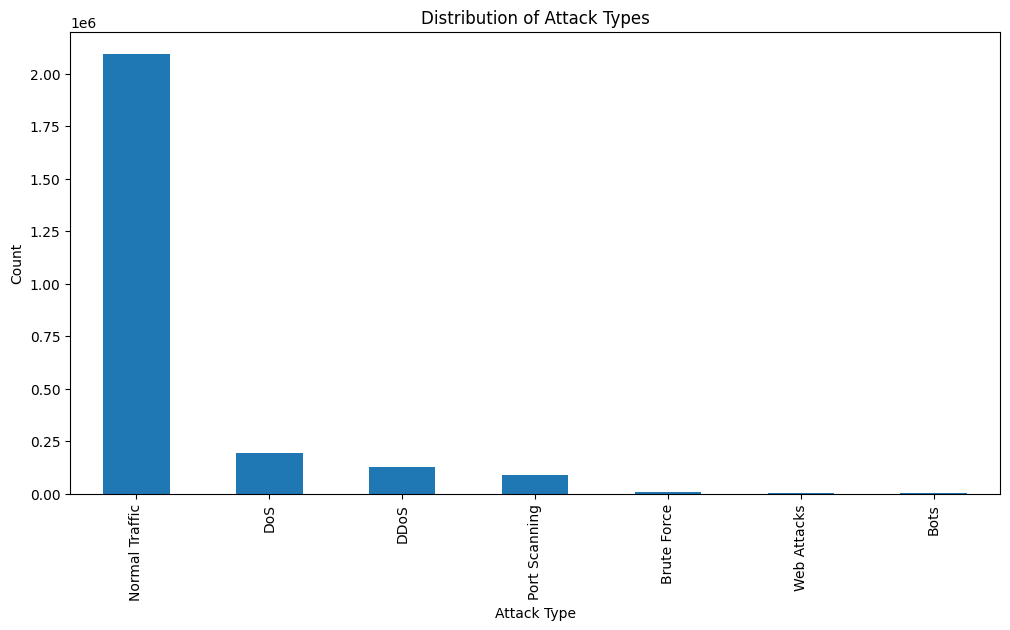

In [ ]:
# visualize attack types distribution
attack_counts = df['Attack_Type'].value_counts()
plt.figure(figsize=(12, 6))
attack_counts.plot(kind='bar')
plt.title('Distribution of Attack Types')
plt.xlabel('Attack Type')
plt.ylabel('Count')
plt.show()

In [ ]:
df['Attack_Type'].unique()

array(['Normal Traffic', 'Port Scanning', 'Web Attacks', 'Brute Force',
       'DDoS', 'Bots', 'DoS'], dtype=object)

In [ ]:
# Train on normal traffic only
X_train_oc = X_train[y_train=="Normal Traffic"]

In [ ]:
X_train_robust = robust.fit_transform(X_train_oc)
X_train_scaled = standard.fit_transform(X_train_robust)

In [ ]:
y_val_bin = np.where(y_val=="Normal Traffic", 1, -1) # 1 for Normal and -1 for Attack
y_test_bin = np.where(y_test=="Normal Traffic", 1, -1)

In [ ]:
X_train_oc_scaled = standard.fit_transform(robust.fit_transform(X_train[y_train=="Normal Traffic"]))

In [ ]:
numeric_cols = df.select_dtypes(include=['number']).columns


In [ ]:
from sklearn.feature_selection import VarianceThreshold
selector = VarianceThreshold(threshold=0.0)
df_reduced = selector.fit_transform(df[numeric_cols])


In [ ]:
# Train only on normal traffic
iso_forest = IsolationForest(
    n_estimators=400,
    max_samples='auto',
    contamination=0.10,   
    max_features=1.0,
    bootstrap=False,
    n_jobs=-1,
    random_state=42
)
iso_forest.fit(X_train_oc_scaled)

,n_estimators,400
,max_samples,'auto'
,contamination,0.15
,max_features,1.0
,bootstrap,False
,n_jobs,-1
,random_state,42
,verbose,0
,warm_start,False


In [ ]:
y_val_pred = iso_forest.predict(X_val_scaled)
y_val_pred_labels = np.where(y_val_pred == 1, "Normal Traffic", "Attack")


# Map to original labels for evaluation
y_val_binary = np.where(y_val=="Normal Traffic", "Normal Traffic", "Attack")


print("Validation set performance:")
print(classification_report(y_val_binary, y_val_pred_labels, zero_division=0))

In [ ]:
# Predict on test set
y_pred = iso_forest.predict(X_test_scaled)  

y_pred_labels = np.where(y_pred == 1, "Normal Traffic", "Attack")

y_test_binary = np.where(y_test=="Normal Traffic", "Normal Traffic", "Attack")

print(classification_report(y_test_binary, y_pred_labels, zero_division=0))


                precision    recall  f1-score   support

        Attack       0.40      0.56      0.47     63854
Normal Traffic       0.90      0.83      0.86    314235

      accuracy                           0.78    378089
     macro avg       0.65      0.69      0.67    378089
  weighted avg       0.82      0.78      0.80    378089



In [ ]:
# detect outliers with iqr

Q1 = np.percentile(X_train_oc_scaled, 25, axis=0)
Q3 = np.percentile(X_train_oc_scaled, 75, axis=0)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Count outliers per feature
outlier_counts = ((X_train_oc_scaled < lower_bound) | (X_train_oc_scaled > upper_bound)).sum(axis=0)
outlier_percent = outlier_counts / X_train_oc_scaled.shape[0] * 100


outliers_df = pd.DataFrame({
    'outlier_count': outlier_counts,
    'outlier_percent': outlier_percent
})


pd.set_option('display.max_rows', None)     

display(outliers_df.sort_values('outlier_percent', ascending=False))

,outlier_count,outlier_percent
11,354317,24.161926
7,345855,23.584877
1,340685,23.232319
21,339509,23.152124
31,336284,22.932202
18,335785,22.898174
19,332070,22.644837
25,328154,22.377793
0,327628,22.341924
20,324006,22.094929


In [ ]:
# Assuming X_train_oc is your original DataFrame before scaling
column_names = X_train_oc.columns

outliers_df = pd.DataFrame({
    'feature': column_names,
    'outlier_count': outlier_counts,
    'outlier_percent': outlier_percent
})

# Sort by outlier percentage descending
outliers_df_sorted = outliers_df.sort_values('outlier_percent', ascending=False)

# Display top 10
top_outliers = outliers_df_sorted.head(10)

# Optional: highlight top 10 with color in Jupyter
def highlight_max(s):
    return ['background-color: yellow' if v == s.max() else '' for v in s]

display(top_outliers.style.apply(highlight_max, subset=['outlier_percent']))


,feature,outlier_count,outlier_percent
11,Bwd_Packet_Length_Std,354317,24.161926
7,Fwd_Packet_Length_Std,345855,23.584877
1,Flow_Duration,340685,23.232319
21,Fwd_IAT_Max,339509,23.152124
31,Bwd_Packets/s,336284,22.932202
18,Fwd_IAT_Total,335785,22.898174
19,Fwd_IAT_Mean,332070,22.644837
25,Bwd_IAT_Std,328154,22.377793
0,Destination_Port,327628,22.341924
20,Fwd_IAT_Std,324006,22.094929


In [ ]:
from scipy.stats.mstats import winsorize
from sklearn.preprocessing import RobustScaler
import numpy as np

# Make a copy
X_train_oc = X_train_oc.copy()

# Numeric columns
numeric_cols = ['Bwd_Packet_Length_Std', 'Fwd_Packet_Length_Std', 'Flow_Duration', 'Fwd_IAT_Max']

# Optional: apply log-transform to highly skewed features first
skewed_cols = ['Flow_Duration', 'Fwd_IAT_Max']  # adjust based on skew
for col in skewed_cols:
    X_train_oc[col] = np.log1p(X_train_oc[col])

# Apply winsorization (cap 5-10% tails is usually enough)
for col in numeric_cols:
    X_train_oc[col] = winsorize(X_train_oc[col], limits=[0.05, 0.05])

# Scale all numeric columns
scaler = RobustScaler()
X_train_oc[numeric_cols] = scaler.fit_transform(X_train_oc[numeric_cols])


In [ ]:
for col in numeric_cols:
    outliers = ((X_train_oc[col] < -3) | (X_train_oc[col] > 3)).sum()
    print(col, outliers)

Bwd_Packet_Length_Std 0
Fwd_Packet_Length_Std 0
Flow_Duration 0
Fwd_IAT_Max 0


In [ ]:
outlier_counts = []
outlier_percent = []

for col in numeric_cols:
    count = ((X_train_oc[col] < -3) | (X_train_oc[col] > 3)).sum()
    outlier_counts.append(count)
    outlier_percent.append(count / len(X_train_oc) * 100)

outliers_df = pd.DataFrame({
    'feature': numeric_cols,
    'outlier_count': outlier_counts,
    'outlier_percent': outlier_percent
})

display(outliers_df)


,feature,outlier_count,outlier_percent
0,Bwd_Packet_Length_Std,0,0.0
1,Fwd_Packet_Length_Std,0,0.0
2,Flow_Duration,0,0.0
3,Fwd_IAT_Max,0,0.0


In [ ]:
# Train only on normal traffic
iso_forest = IsolationForest(
    n_estimators=400,
    max_samples='auto',
    contamination=0.10,   
    max_features=1.0,
    bootstrap=False,
    n_jobs=-1,
    random_state=42
)
iso_forest.fit(X_train_oc_scaled)

In [ ]:
y_val_pred = iso_forest.predict(X_val_scaled)
y_val_pred_labels = np.where(y_val_pred == 1, "Normal Traffic", "Attack")


# Map to original labels for evaluation
y_val_binary = np.where(y_val=="Normal Traffic", "Normal Traffic", "Attack")


print("Validation set performance:")
print(classification_report(y_val_binary, y_val_pred_labels, zero_division=0))

In [ ]:
# Predict on test set
y_pred = iso_forest.predict(X_test_scaled)  

y_pred_labels = np.where(y_pred == 1, "Normal Traffic", "Attack")

y_test_binary = np.where(y_test=="Normal Traffic", "Normal Traffic", "Attack")

print(classification_report(y_test_binary, y_pred_labels, zero_division=0))

In [ ]:
# from sklearn.decomposition import PCA

# # Keep 40–60 dims for LOF
# pca = PCA(n_components=30, random_state=42)
# pca.fit(X_train_oc_scaled)

# X_train_pca = pca.transform(X_train_oc_scaled)
# X_val_pca   = pca.transform(X_val_scaled)
# X_test_pca  = pca.transform(X_test_scaled)

In [ ]:

# from sklearn.neighbors import LocalOutlierFactor
# lof = LocalOutlierFactor(
#     n_neighbors=30,         # tune 20,30,40,50,70
#     contamination=0.02,
#     novelty=True           # allows .predict()
# )

# lof.fit(X_train_pca)

In [ ]:
# lof_scores_train = lof.decision_function(X_train_pca)
# lof_scores_val   = lof.decision_function(X_val_pca)
# lof_scores_test  = lof.decision_function(X_test_pca)

# lof_pred_test = lof.predict(X_test_pca)
# lof_pred_test = np.where(lof_pred_test == -1, 1, 0)